<a href="https://colab.research.google.com/github/yenlung/Py-Math-Book/blob/main/%E5%86%92%E9%9A%AA14_%E6%95%B8%E5%AD%B8%E7%9A%84%E5%9F%BA%E6%9C%AC%E5%9E%8B%E6%98%AF%E9%9B%86%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

### 1. list 為什麼不是集合?

看看兩個有一樣元素的串列, 順序不同時是否是不同的串列。

In [2]:
egg = [1, 2, 3]
ham = [3, 1, 2]

In [3]:
egg == ham

False

果然順序要完全一樣才可以。

In [4]:
spam = [1, 2, 3]

In [5]:
egg == spam

True

因為有順序, 所以才可以指定「第幾個」元素。而 Python 都是從 0 數起。

In [6]:
egg[0]

1

另一個和集合不同的是, 有重覆的元素是可以的。

In [7]:
egg = [2, 3, 3]
ham = [2, 3]

In [8]:
egg == ham

False

### 2. Python 其實也有集合!

In [9]:
egg = [1, 2, 3]
ham = [3, 2, 1]

In [10]:
set_egg = set(egg)
set_ham = set(ham)

In [11]:
set_egg == set_ham

True

重覆的元素也會被忽略。

In [12]:
set_egg = set([3, 2, 3])
set_ham = set([2, 3])

In [13]:
set_egg == set_ham

True

In [14]:
set_egg

{2, 3}

這有什麼用呢? 其實有很多用處, 比如說我們想算一段文字中出現多少個不同的字。

In [15]:
sentence = "在政大不時會聽到阿鶇招牌聲音，就是很像腳踏車煞車「嘰—」的聲音。但最初都沒看到阿鶇的身影，所以我就有想「尋找台灣紫嘯鶇」的念頭。後來發現這實在是多餘的，因為阿鶇時不時會進到我們果夫樓、行政大樓等等逛大街。"

In [16]:
len(sentence)

102

In [17]:
message = list(sentence)

可以看一下 `message` 內容 (太長了先省略)。

In [18]:
#message

In [19]:
len(set(message))

70

有 70 個不同的字, 不過這是把標點符號算進去的。怎麼樣可以不算到標點符號呢? 當然有很多種做法, 我們這裡用個「非正統」寫法!

In [20]:
egg = list(set(message))

In [21]:
egg.sort()

觀察一下， 可以發現前後有 6 個標點符號。

In [22]:
#egg

In [23]:
len(egg)-6

64

注意變成集合之後, 是不能換的排序 (沒有順序), 所以也不能拿出第幾個元素。

In [24]:
set_egg = set(egg)

In [25]:
set_egg.sort()

AttributeError: ignored

In [ ]:
set_egg[0]

但是一一拿出裡面的原素還是可以的!

In [26]:
for c in set_egg:
    print(c, end='*')

想*所*尋*夫*。*嘰*進*為*、*實*車*「*紫*像*到*們*台*最*不*身*聲*餘*，*就*」*找*沒*來*在*招*—*會*煞*頭*是*灣*街*有*初*很*等*腳*牌*多*音*阿*發*踏*影*時*的*行*但*樓*嘯*看*因*這*鶇*現*念*我*聽*果*都*逛*大*政*後*以*

### 3. 集合的運算

某天還在宿舍的時候, 有颱風要來, 你和室友開始要準備一些東西, 你們分別列了需要物品的清單。假設你列的是這樣。

In [27]:
X = {"泡麵", "手電筒", "水", "零食"}

你的室友列的是這樣。

In [28]:
Y = {"麵包", "零食", "咖啡濾泡包"}

我們可以看看有沒有人是想到對方想的全部。

In [29]:
X.issubset(Y)

False

In [30]:
Y.issubset(X)

False

這也不錯, 沒人想到對方的完整版。我們可以用聯集做出完成清單。

In [31]:
Z = X.union(Y)

In [32]:
Z

{'咖啡濾泡包', '手電筒', '水', '泡麵', '零食', '麵包'}

檢查一下某件物品有沒有在清單之中。

In [33]:
"泡麵" in Z

True

In [34]:
"洋芉片" in Z

False

當然也可以看交集。

In [35]:
X.intersection(Y)

{'零食'}

還有個很有趣的 "差集" 運算, 可以看出一個人想到, 另一個人沒想到的。

In [36]:
X - Y

{'手電筒', '水', '泡麵'}

In [37]:
Y - X

{'咖啡濾泡包', '麵包'}

或者最後清單中你遺漏的。

In [38]:
Z - X

{'咖啡濾泡包', '麵包'}

### 4. 凱薩密碼

復習一下我們的 list comprehension

In [39]:
O = {2*n+1 for n in range(5)}

In [40]:
O

{1, 3, 5, 7, 9}

如果要強調順序, 可以用 `list` 確保是我們要的順序。

In [41]:
O = [2*n+1 for n in range(5)]

In [42]:
O

[1, 3, 5, 7, 9]

這的確是個無聊的例子, 這裡來說點有趣的, 就是實作「凱薩密碼」。凱薩密碼加密的方式很簡單, 首先我們 先給每個英文字母一個數字, 例如 A 是 0, B 是 1, 等等的。換成密碼就是加上一個定數, 比如 說3。於是A加密會變成D,B變成E等等,就這麼簡單!

英文字母怎麼換成數字 (或數字換成英文字母) 有很多種作法, 記得以前用過 Python 內建的方式 來做。

In [43]:
ord('A')

65

把數字再變成文字。

In [44]:
chr(65)

'A'

我們發現 A 的 (ASCII) 編碼是 65, 要變成 0 當然就減 65 就好。於是我們可以試著加密一個字。

In [45]:
plain = "APPLE"

創造一個串列, 內容是 "A", "P", "P", "L", "E" 代表的數字。

In [47]:
[ord(c)-65 for c in plain]

[0, 15, 15, 11, 4]

這時我們把一個數字加上固定的數, 比如說 3, 就代表凱薩密碼的數字。

In [48]:
[ord(c)-65+3 for c in plain]

[3, 18, 18, 14, 7]

你一定會想到, "Z" 是 25 (第 26 個數字), 再加 3 就爆了 (28)。因此, 算到 26 要再從 0 開始, 比如 "Z" 是 2

In [50]:
[(ord(c)-65+3)%26 for c in plain]

[3, 18, 18, 14, 7]

來個有 "Z" 的字。

In [51]:
[(ord(c)-65+3)%26 for c in "ZOO"]

[2, 17, 17]

最後加上 65, 就是 ASCII 碼。

In [52]:
[(ord(c)-65+3)%26 + 65 for c in plain]

[68, 83, 83, 79, 72]

於是我們就可以顯示出這個字

In [54]:
egg = [chr((ord(c)-65+3)%26+65) for c in plain]

In [55]:
egg

['D', 'S', 'S', 'O', 'H']

串起來!

In [56]:
cipher = "".join(egg)

In [57]:
cipher

'DSSOH'

### 5. 冰雹數列

前一項數字為 $n$, 下一項為:

$$\begin{cases} 
\dfrac{n}{2} & \mbox{當 $n$ 是偶數}\\
3 n + 1 & \mbox{當 $n$ 是奇數}
\end{cases}$$

In [66]:
n = 3

hail = [n]

while n != 1:
    if n%2:
        n = 3*n+1
        hail.append(n)
    else:
        n = int(n/2)
        hail.append(n)

In [68]:
def hail_seq(n):
    hail = [n]

    while n != 1:
        if n%2:
            n = 3*n+1
            hail.append(n)
        else:
            n = int(n/2)
            hail.append(n)

    return hail

In [69]:
hail_seq(27)

[27,
 82,
 41,
 124,
 62,
 31,
 94,
 47,
 142,
 71,
 214,
 107,
 322,
 161,
 484,
 242,
 121,
 364,
 182,
 91,
 274,
 137,
 412,
 206,
 103,
 310,
 155,
 466,
 233,
 700,
 350,
 175,
 526,
 263,
 790,
 395,
 1186,
 593,
 1780,
 890,
 445,
 1336,
 668,
 334,
 167,
 502,
 251,
 754,
 377,
 1132,
 566,
 283,
 850,
 425,
 1276,
 638,
 319,
 958,
 479,
 1438,
 719,
 2158,
 1079,
 3238,
 1619,
 4858,
 2429,
 7288,
 3644,
 1822,
 911,
 2734,
 1367,
 4102,
 2051,
 6154,
 3077,
 9232,
 4616,
 2308,
 1154,
 577,
 1732,
 866,
 433,
 1300,
 650,
 325,
 976,
 488,
 244,
 122,
 61,
 184,
 92,
 46,
 23,
 70,
 35,
 106,
 53,
 160,
 80,
 40,
 20,
 10,
 5,
 16,
 8,
 4,
 2,
 1]

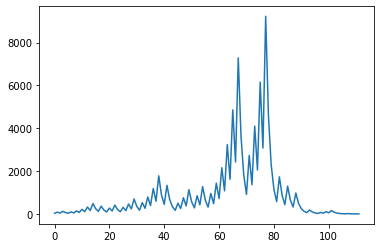

In [71]:
plt.plot(hail_seq(27))

集合也可以增增減減嗎? 答案是肯定的。

In [72]:
egg = {1, 2, 3, 4}

In [74]:
egg.add(94)

In [75]:
egg.add(87)

In [76]:
egg

{1, 2, 3, 4, 87, 94}

In [77]:
egg.remove(4)

In [78]:
egg

{1, 2, 3, 87, 94}

### 6. 笛卡兒乘積

我們來做出所有樸克牌!

In [88]:
suits = list("♣♦♥♠")
ranks = list("A23456789TJQK")

In [89]:
suits

['♣', '♦', '♥', '♠']

In [90]:
ranks[9]="10"

In [91]:
ranks

['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

In [92]:
deck = [(s,r) for s in suits for r in ranks]

In [93]:
deck

[('♣', 'A'),
 ('♣', '2'),
 ('♣', '3'),
 ('♣', '4'),
 ('♣', '5'),
 ('♣', '6'),
 ('♣', '7'),
 ('♣', '8'),
 ('♣', '9'),
 ('♣', '10'),
 ('♣', 'J'),
 ('♣', 'Q'),
 ('♣', 'K'),
 ('♦', 'A'),
 ('♦', '2'),
 ('♦', '3'),
 ('♦', '4'),
 ('♦', '5'),
 ('♦', '6'),
 ('♦', '7'),
 ('♦', '8'),
 ('♦', '9'),
 ('♦', '10'),
 ('♦', 'J'),
 ('♦', 'Q'),
 ('♦', 'K'),
 ('♥', 'A'),
 ('♥', '2'),
 ('♥', '3'),
 ('♥', '4'),
 ('♥', '5'),
 ('♥', '6'),
 ('♥', '7'),
 ('♥', '8'),
 ('♥', '9'),
 ('♥', '10'),
 ('♥', 'J'),
 ('♥', 'Q'),
 ('♥', 'K'),
 ('♠', 'A'),
 ('♠', '2'),
 ('♠', '3'),
 ('♠', '4'),
 ('♠', '5'),
 ('♠', '6'),
 ('♠', '7'),
 ('♠', '8'),
 ('♠', '9'),
 ('♠', '10'),
 ('♠', 'J'),
 ('♠', 'Q'),
 ('♠', 'K')]

In [94]:
len(deck)

52

### 7. 拍拍機器人的三種做法

In [95]:
def chat(message):
    response = "拍拍!"
    print(">>" + message)
    print(response) 

In [96]:
message = input()

chat(message)

我很難過。
>>我很難過。
拍拍!


我們互動試試看。

In [99]:
from ipywidgets import interact_manual

In [100]:
interact_manual(chat, message="你想說什麼呢?");

interactive(children=(Text(value='你想說什麼呢?', description='message'), Button(description='Run Interact', style=B…

這樣子只顯示一句話怪怪的... 我們來用三種方式來做一直聊下去的拍拍機器人。

#### (1) 用 global 變數

一般函式外的變數裡面是看不到的..

In [101]:
def add_one():
    k = k + 1

In [102]:
k = 87

add_one()

UnboundLocalError: ignored

In [103]:
def add_one():
    global k
    k = k + 1

In [104]:
k

87

In [105]:
add_one()

In [106]:
k

88

有記憶的拍拍機器人!

In [107]:
def pypy1(message):
    global history

    response = "拍拍!"
    history.append((message, response))

    for (m, r) in history:
        print(">>" + m)
        print(r)
        print()


In [109]:
history = []

interact_manual(pypy1, message="你想說什麼呢？");

interactive(children=(Text(value='你想說什麼呢？', description='message'), Button(description='Run Interact', style=B…

#### (2) 獨立打造的 

In [110]:
from ipywidgets import widgets
from IPython.display import display

In [111]:
text = widgets.Text()
display(text)

Text(value='')

In [112]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(">> " + dtext.value)
    print("拍拍")
    print()

text.on_submit(handle_submit)

Text(value='')

>> 今天很難過
拍拍

>> 程式都不會寫
拍拍



#### (3) Gradio

In [113]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 4.7 MB/s 
     |████████████████████████████████| 106 kB 53.2 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 278 kB 76.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 213 kB 52.7 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 2.3 MB 62.3 MB/s 
     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 68 kB 6.0 M

In [116]:
import gradio as gr

In [114]:
def pypy3(message, history=[]):
    response = "拍拍!"
    history.append((message, response))
    return history, history


In [117]:
iface = gr.Interface(pypy3,
                     inputs = ["text", "state"],
                     outputs = ["chatbot", "state"])

In [118]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>